# Introduction
## Purpose
The purpose of this project is to apply Exploratory Data Analysis (EDA) techniques to a dataset to select the relevant features to build and compare Machine Learning models to predict a student's performance on exams based on their score.
The techniques, libraries and models used during the project are in line with the content covered by the course "[Introduction to Machine Learning: Supervised Learning](https://https://www.coursera.org/learn/introduction-to-machine-learning-supervised-learning)" of the University of Colorado Boulder and **are for educational purposes only as the dataset is fictional**.

## About the Data
###Source
Dataset URL: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores
Dataset single sourced from: Expanded_data_with_more_features.csv
Size: 15 columns, 30k rows , 2.9MB

###Data Dictionary (Column Description)
1.   **Unnamed**:  Unique Numerical Identifier (0 - 30640)
2.   **Gender**:  Gender of the student (male/female)
3.   **EthnicGroup**:  Ethnic group of the student (group A to E)
4.   **ParentEduc**:  Parent(s) education background (from some_highschool to master's degree)
5.   **LunchType**:  School lunch type (standard or free/reduced)
6.   **TestPrep**:  Test preparation course followed (completed or none)
7.   **ParentMaritalStatus**:  Parent(s) marital status (married/single/widowed/divorced)
8.   **PracticeSport**:  How often the student parctice sport (never/sometimes/regularly))
9.   **IsFirstChild**:  If the child is first child in the family or not (yes/no)
10.   **NrSiblings**:  Number of siblings the student has (0 to 7)
11.   **TransportMeans**:  Means of transport to school (schoolbus/private)
12.   **WklyStudyHours**:  Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
13.   **MathScore**:  math test score(0-100)
14.   **ReadingScore**:  reading test score(0-100)
15.   **WritingScore**:  writing test score(0-100)

Descriptions were sourced directly from the data description in Kaggle. Data types and appropriate formats will be discussed as part of the EDA exercise.

author: [Bruno Velleca](https://github.com/brucamail),
repository link: [CSCA5622](https://github.com/brucamail/MSCS-Machine-Learning/blob/main/CSCA5622/CSCA_5622_Supervised_Learning_Final_Project.ipynb)



---




In [157]:
#importing the libraries
!pip install -q category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

from IPython.display import display, HTML

In [158]:
#importing the dataset from Kaggle using Colab Secrets https://www.kaggle.com/discussions/general/74235#2580958
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

# !kaggle datasets download -d hamzanabil/africa-cup-of-nations-squads-list
!kaggle datasets download -d desalegngeb/students-exam-scores
!unzip students-exam-scores.zip

Dataset URL: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores
License(s): other
students-exam-scores.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  students-exam-scores.zip
replace Expanded_data_with_more_features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Original_data_with_more_rows.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [159]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [160]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#Part A: Exploratory Data Analysis (EDA)
As part of the EDA, 2 steps were performed before to first clean the data and then visualize it to build the ML model:

**1. Data Cleaning**

As part of the data cleaning we'll evaluate the dataset and adjust the data to fit our Machine Learning Model, as follows:
1. Target Value selection
2. Feature Cleaning

**2. Data Visualization**

1.  Checking the distribution of categorical features
2.  Checking the distribution of numerical features

---


## 1.Data Cleaning

## 1.1. Target Value Selection
For the target value, there are 3 columns we could use as the target value for our model:
*   Math Score
*   Reading Score
*   Writting Score

Because we are trying to prediict a student's performance on different factors, we are not interested in a specific subject score, but the students performance overall. With that in mind we'll first check if there are any null values in the observations, than we'll check how correlated the scores for each subject are and finally we'll create a **Avg Score** column that will be used as the target for our ML model.

In [161]:
#checking null values
target_cols = ['MathScore', 'ReadingScore', 'WritingScore']
df[target_cols].isnull().sum()

,0
MathScore,0
ReadingScore,0
WritingScore,0


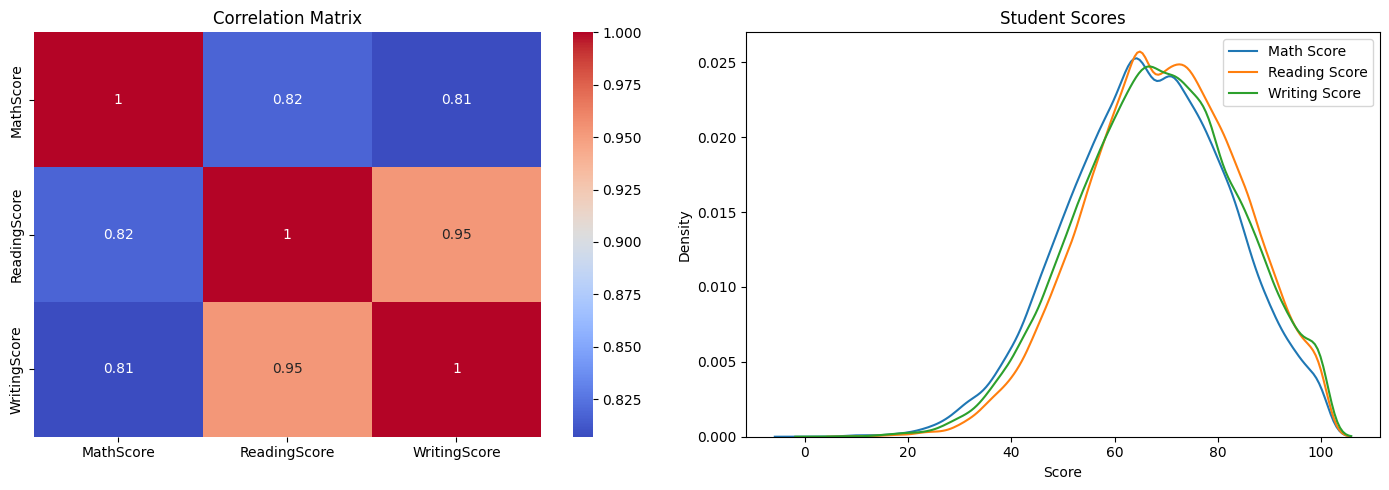

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Correlation Matrix (Plot 1)
corr_matrix = df[target_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix')

# Distribution Plot (Plot 2)
sns.kdeplot(df['MathScore'], label='Math Score', ax=axes[1])
sns.kdeplot(df['ReadingScore'], label='Reading Score', ax=axes[1])
sns.kdeplot(df['WritingScore'], label='Writing Score', ax=axes[1])
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Density')
axes[1].set_title('Student Scores')
axes[1].legend()

plt.tight_layout()
plt.show()

There is a high correlation between scores ranging from 0.81 to 0.95 with a similar distribution pattern between them all, therefore it should be ok to create a new target to represent our student scores. Below we'll evaluate 3 options.


1.   Average Score: Uses the average score from the 3 student scores
2.   Best Score: Uses the best score out of the 3 scores
3.   Worst Score: Uses the worst score out of the 3 scores



In [163]:

#Option 1: creating the new avg_score column
df['avg_score'] = df[target_cols].mean(axis=1)

#Option 2: Using the best_score
df['best_score'] = df[target_cols].max(axis=1)


#Option 3 Using worst_score
df['worst_score'] = df[target_cols].min(axis=1)

all_target_cols = target_cols + ['avg_score', 'best_score', 'worst_score']
df[all_target_cols].describe()

,MathScore,ReadingScore,WritingScore,avg_score,best_score,worst_score
count,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,66.558402,69.377533,68.418622,68.118186,72.769981,62.967168
std,15.361616,14.758952,15.443525,14.454327,14.564607,14.814291
min,0.000000,10.000000,4.000000,9.000000,12.000000,0.000000
25%,56.000000,59.000000,58.000000,58.333333,63.000000,53.000000
50%,67.000000,70.000000,69.000000,68.333333,73.000000,63.000000
75%,78.000000,80.000000,79.000000,78.666667,83.000000,74.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


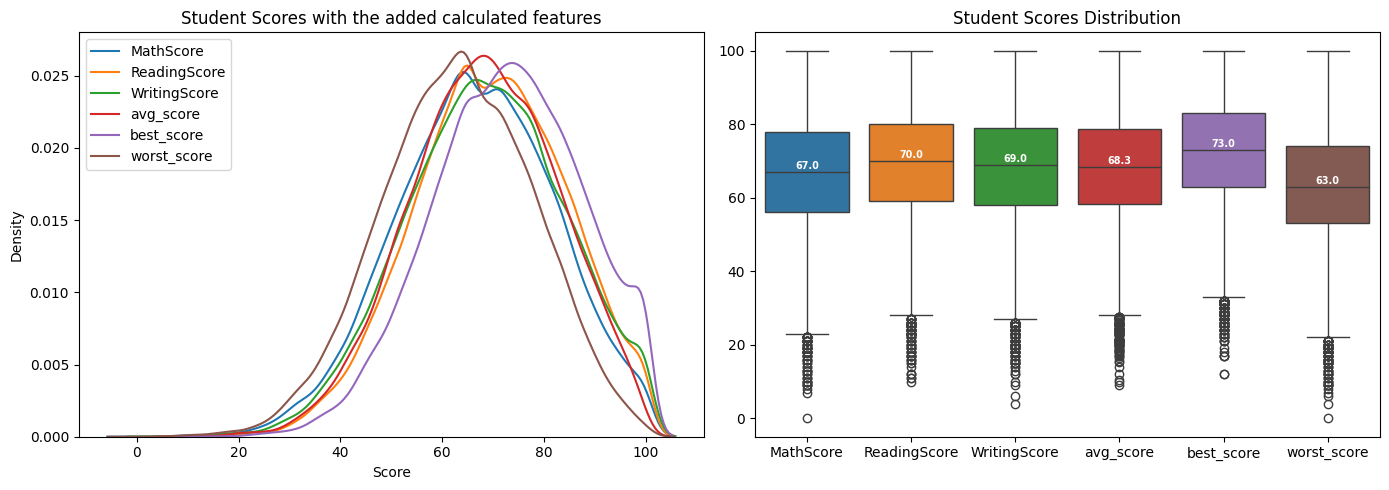

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Distribution Plot for all target values
for i in range(len(all_target_cols)):
  sns.kdeplot(df[all_target_cols[i]], label=all_target_cols[i], ax=axes[0])
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Density')
axes[0].set_title('Student Scores with the added calculated features')
axes[0].legend()

#Plot 2 - Boxplot of the values distribution
box_plot = sns.boxplot(data=df[all_target_cols], ax=axes[1])
axes[1].set_title('Student Scores Distribution')

medians = df[all_target_cols].median()
vertical_offset = df[all_target_cols].std() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians.iloc[xtick] + vertical_offset.iloc[xtick],
            f'{medians.iloc[xtick]:.1f}', # Format to 1 decimal place using .iloc
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.tight_layout()
plt.show()

**Learnings**:

When comparing the distribution curves for the 3 calculated options (average score, best score and worst score) it is possible to see that the distribution for best and worst are slightlty dislocated from the center of the data.
Best score provides a higher median score while the worst score provides a lower median score. **Avg score** provides a smoother distribuition with a distribution in line with the student scores fairly representing the data and the best of the options to use as a target for our model.


---



## 1.2. Feature Cleaning
Steps performed to clean the data:
1. Updating Variable types aiming for a better and simpler regression model. The values according to the changes below:
*   LunchType: From categorical to binary. New column: StandardLunch: (0. Free/Reduced, 1.Standard)
*   TestPrep: From categorical to binary. (0. none, 1.completed)
*   PracticeSport: From categorical to numerical. New column: SportLevel  (0. never, 1 .sometimes, 2. regularly)
*   IsFirstChild: From categorical to binary (0. no, 1. yes)
*   WklyStudyHours: From categorical to numerical. New column:StudyLevel: (0. '< 5', 1. '5 - 10', 2. '> 10')
*   ParentEduc: From categorical to numerical. (0. some high school, 1. high school, 2. some college, 3. associate's degree, 4.bachelor's degree, 5.master's degree)
*   TransportMeans: From categorical to binary. New column: UsesSchoolBus: (0. private, 1.school_bus)
*   Gender:  From categorical to binary. New column: IsMale: (0. female, 1. male)

2.  Dropping NA observations and the *Unnamed* column - it is an ID column with no value to the model. By dropping all the NA observations our dataset drops to 19k observations (11k NA observations were discarded).


### 1.2.1. Updating Variable types

In [165]:
for column in df.columns:
  #getting column values to build dictionaries
  if column not in all_target_cols and not column.startswith('Unnamed'):
    col_values = df[column].unique()
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values", col_values)

Gender: 2 distinct values ['female' 'male']
EthnicGroup: 6 distinct values [nan 'group C' 'group B' 'group A' 'group D' 'group E']
ParentEduc: 7 distinct values ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
LunchType: 2 distinct values ['standard' 'free/reduced']
TestPrep: 3 distinct values ['none' nan 'completed']
ParentMaritalStatus: 5 distinct values ['married' 'single' 'widowed' nan 'divorced']
PracticeSport: 4 distinct values ['regularly' 'sometimes' 'never' nan]
IsFirstChild: 3 distinct values ['yes' 'no' nan]
NrSiblings: 9 distinct values [ 3.  0.  4.  1. nan  2.  5.  7.  6.]
TransportMeans: 3 distinct values ['school_bus' nan 'private']
WklyStudyHours: 4 distinct values ['< 5' '5 - 10' '> 10' nan]


In [166]:
# dictionaries for the mapping function
lunch_type_dict = {'standard': 1, 'free/reduced': 0}
test_prep_dict = {'completed': 1, 'none': 0}
sport_level_dict = {'never': 0, 'sometimes': 1, 'regularly': 2}
is_first_child_dict = {'yes': 1, 'no': 0}
study_level_dict = {'< 5': 0, '5 - 10': 1, '> 10': 2}
transport_means_dict = {'private': 0, 'school_bus': 1}
parent_educ_dict = {'some high school': 0, 'high school': 1, 'some college': 2, 'associate\'s degree': 3, 'bachelor\'s degree': 4, 'master\'s degree': 5}
gender_dict = {'female': 0, 'male': 1}
ethinic_group_dict = {'group A': 'A', 'group B': 'B', 'group C': 'C', 'group D': 'D', 'group E': 'E'}

# applyng the dictionaries:
df['StandardLunch'] = df['LunchType'].map(lunch_type_dict)
df['TestPrep'] = df['TestPrep'].map(test_prep_dict)
df['SportLevel'] = df['PracticeSport'].map(sport_level_dict)
df['IsFirstChild'] = df['IsFirstChild'].map(is_first_child_dict)
df['StudyLevel'] = df['WklyStudyHours'].map(study_level_dict)
df['UsesSchoolBus'] = df['TransportMeans'].map(transport_means_dict)
df['ParentEduc'] = df['ParentEduc'].map(parent_educ_dict)
df['IsMale'] = df['Gender'].map(gender_dict)
df['EthnicGroup'] = df['EthnicGroup'].map(ethinic_group_dict)

#dropping columns we won't use including the target coolumns:
drop_cols = ['LunchType', 'PracticeSport', 'TransportMeans', 'WklyStudyHours', 'Gender']+ all_target_cols
drop_cols.remove('avg_score')
df.drop(drop_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  float64
 3   TestPrep             28811 non-null  float64
 4   ParentMaritalStatus  29451 non-null  object 
 5   IsFirstChild         29737 non-null  float64
 6   NrSiblings           29069 non-null  float64
 7   avg_score            30641 non-null  float64
 8   StandardLunch        30641 non-null  int64  
 9   SportLevel           30010 non-null  float64
 10  StudyLevel           29686 non-null  float64
 11  UsesSchoolBus        27507 non-null  float64
 12  IsMale               30641 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 3.0+ MB


### 1.2.2. Dropping NAs and Unamed column

In [167]:
#drop unamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

#checking for the total of nulls in each column
# print(df.isnull().sum())

#dropping NAs
df.dropna(inplace=True)
# df.info()
df.describe()

,ParentEduc,TestPrep,IsFirstChild,NrSiblings,avg_score,StandardLunch,SportLevel,StudyLevel,UsesSchoolBus,IsMale
count,19243.000000,19243.000000,19243.000000,19243.000000,19243.000000,19243.000000,19243.000000,19243.000000,19243.000000,19243.000000
mean,2.066570,0.345892,0.645274,2.147482,68.257566,0.648132,1.227200,0.895131,0.586187,0.492023
std,1.500887,0.475671,0.478443,1.443735,14.480158,0.477566,0.665991,0.665901,0.492529,0.499949
min,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,58.333333,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,68.333333,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,1.000000,1.000000,3.000000,78.666667,1.000000,2.000000,1.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,7.000000,100.000000,1.000000,2.000000,2.000000,1.000000,1.000000


## 2.Data Visualization

### 2.1. Checking the distribution of categorical features

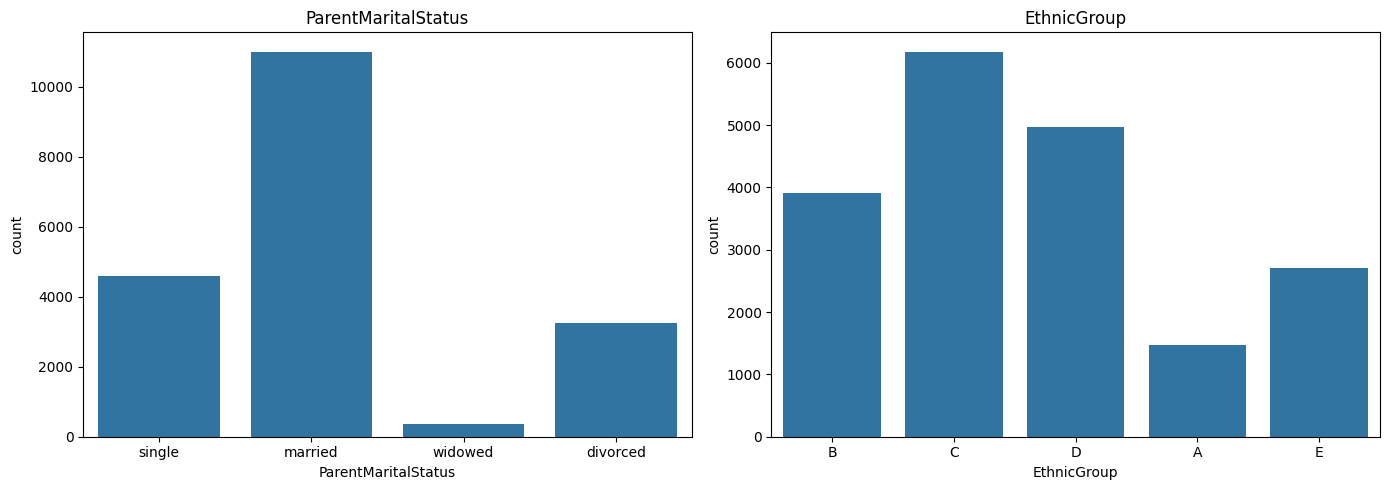

In [168]:
#plots for non numerical features
# histogram for ParentMaritalStatus
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# ParentMaritalStatus
sns.countplot(data=df, x='ParentMaritalStatus', ax=axes[0])
axes[0].set_title('ParentMaritalStatus')

#Ethinic Group
sns.countplot(data=df, x='EthnicGroup', ax=axes[1])
axes[1].set_title('EthnicGroup')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'EthnicGroup')

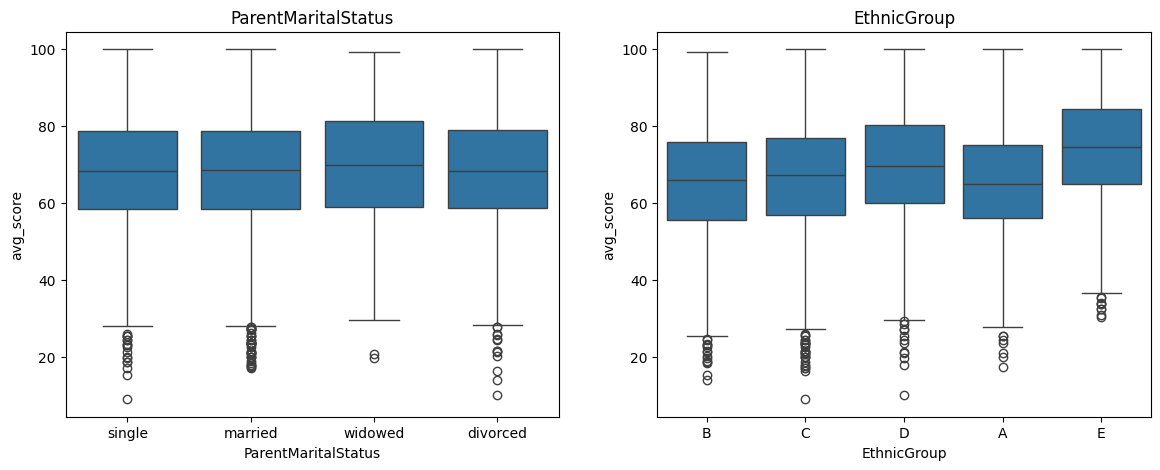

In [169]:
#boxplot non numerical and target value
#boxplot ParentMaritalStatus
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns
box_plot = sns.boxplot(data=df, x='ParentMaritalStatus', y='avg_score', ax=axes[0])
axes[0].set_title('ParentMaritalStatus')

#boxplot EthnicGroup
box_plot = sns.boxplot(data=df, x='EthnicGroup', y='avg_score', ax=axes[1])
axes[1].set_title('EthnicGroup')

### 2.2. Checking the distribution of numerical features

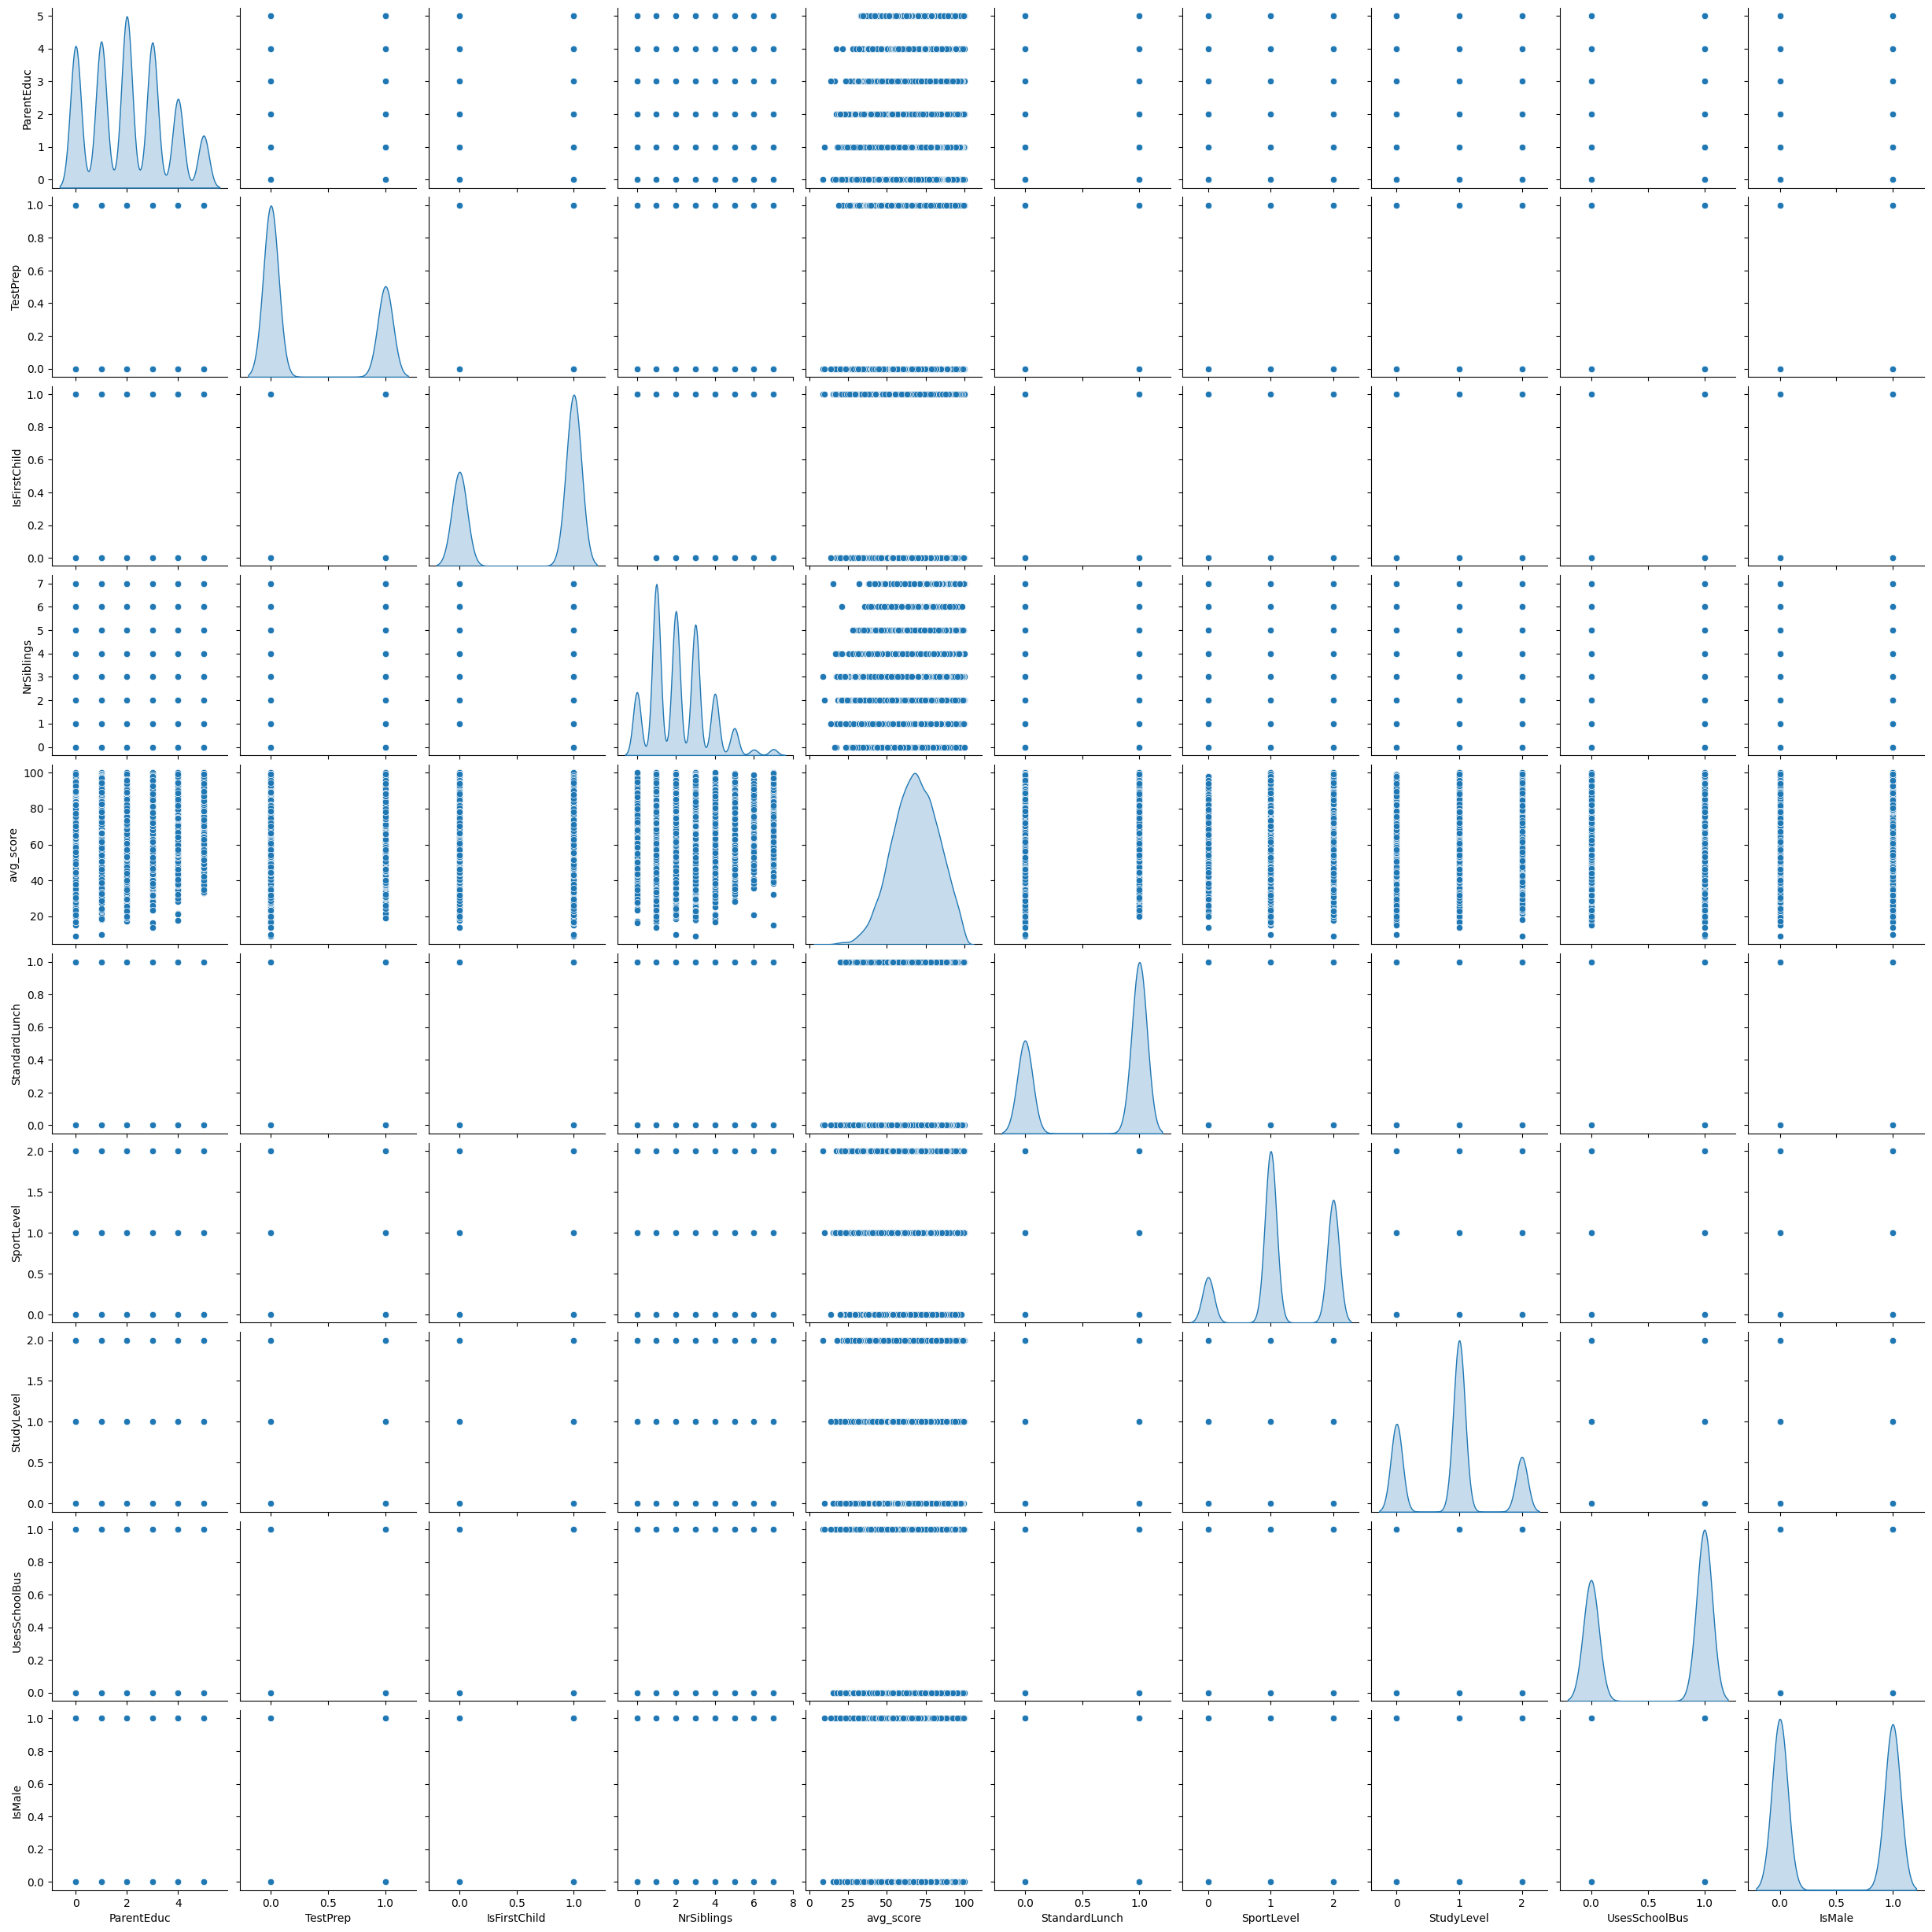

In [180]:
#plots for numerical features
#1 pairplot
sns.pairplot(df, diag_kind = 'kde')

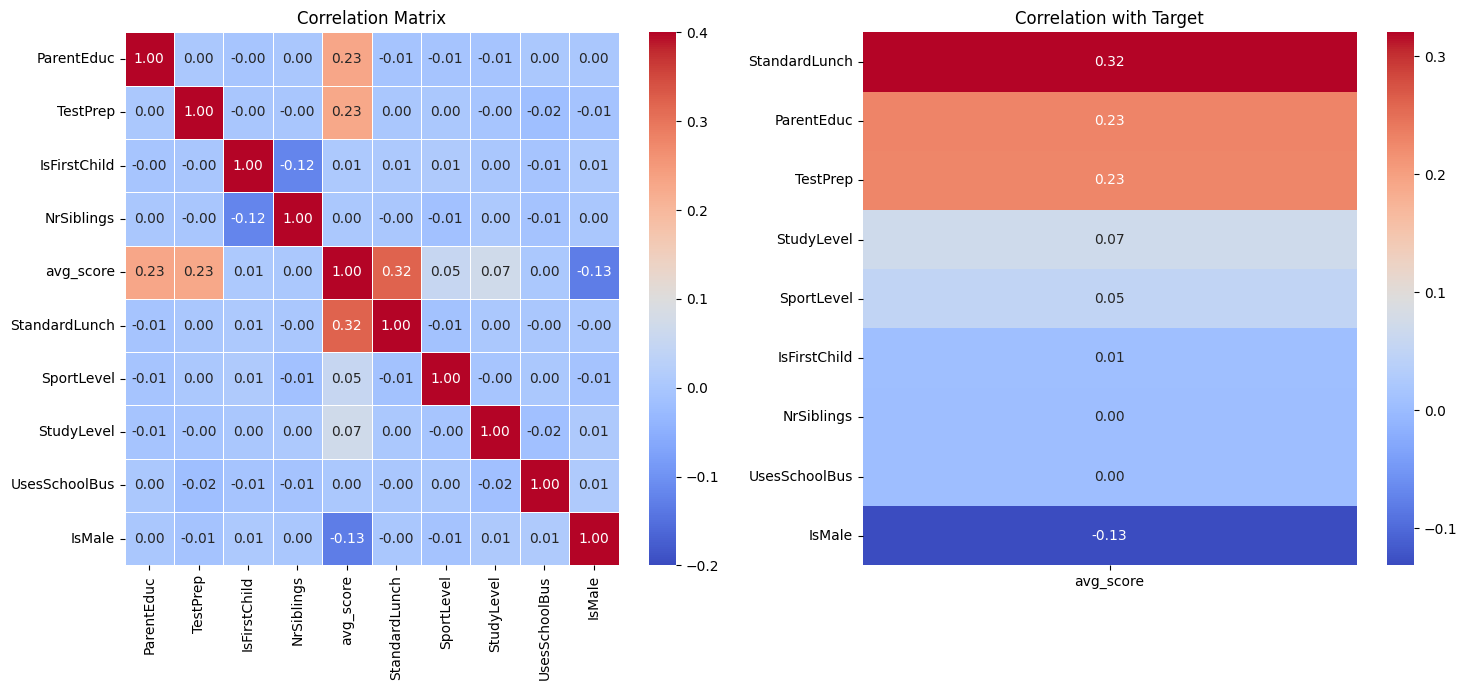

In [171]:
#2 Correlation matrix for all features
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidth=.5, ax=axes[0], vmin=-0.2, vmax=0.4) # adjusting the size of the scale
axes[0].set_title('Correlation Matrix')

#
# 3 correlation matrix for target only
corr = numeric_df.corr()
target_corr = corr['avg_score'].drop('avg_score')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax = axes[1])
axes[1].set_title(f'Correlation with Target')
plt.tight_layout()
plt.show()

**Learnings:**


**Data Cleaning:** After cleaning the data we are left with 19k observations, 10 features and 1 target. Out of the 10 features 8 were are numeric and 2 are categorical.

We can see that some columns have larger number of null values (e.g UsesSchoolBus - 3k null values). For the future, depending on the relevance of this feature and others to the regression model, we could it feature from the feature list before dropping NAs and this would ensure we keep a higher number of the observations.

By doing the right data modifications our model has now only 2 categorical columns instead of 11, making it easier in the future to build regression models without a large increase in the number of features (curse of dimensionality)

**Data Visualization:** When looking at the categorical features, one can note that the average and the distribution for the Ethnic Group E is a little above the the other groups but not noticiable difference between groups in different ParentMaritalStatuses.

By evaluating the pairplot and correlation matrix for the numerical features, there is no clear correlation between them and overall the correlation of the individual features with the target are low, with StandardLunch as the highest feature with a low 0.32 correlation score.

In order to find the right features to build a regression model, we'll need to do further investigation to find the best feature combination for the model.


---



# Part B: Building Machine Learning Models
1. Create a training and testing dataset
2. Model A: Linear Regression Models
3. Model B: Support Vector Machines (Regressor)
4. Evaluate Model performance

## 1.Creating training and testing datasets

In [172]:
#seeding to reduce the sample size to speed up feature selection

# splitting the dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(df.drop('avg_score', axis=1), df['avg_score'], test_size=0.2, random_state=13)

print(X_train.shape)
print(X_test.shape)

#creating a table to save the performance of all models:
model_performance = pd.DataFrame(columns=['Model', 'R2', 'MSE', 'MAE'])
#storing all the models
trained_model_list = []

(15394, 11)
(3849, 11)


##2.Model A: Linear Regression
* Step 1: Find the best predictors
* Build v1 of the model with top predictors
* Step 2: Remove high leverage observations
* Build model v2 using linear regression

### 2.1. Finding best predictors

In [173]:
#finding the best predictors by iterating through the column options
cols = df.drop('avg_score', axis=1).columns
best_score = 0
best_col = ''
best_cols = []

temp_df = X_train.copy()
temp_df['avg_score'] = y_train

for col in cols:
  model = smf.ols(formula='avg_score ~ '+ col, data=temp_df[['avg_score',col]]).fit()
  best_cols.append([col,model.rsquared_adj])
  # print(col, model.rsquared_adj)
  if model.rsquared_adj > best_score:
    best_score = model.rsquared_adj
    best_col = col

best_cols.sort(key=lambda x: x[1], reverse=True)
for col in best_cols:
  print(col[0],":", col[1])

StandardLunch : 0.1027650172248632
ParentEduc : 0.05182340146841102
TestPrep : 0.05084184004678727
EthnicGroup : 0.03912274886089562
IsMale : 0.018091801646086703
StudyLevel : 0.004233997341459239
SportLevel : 0.0022856934192223566
ParentMaritalStatus : -3.109364450870622e-05
UsesSchoolBus : -5.69098257301448e-05
IsFirstChild : -6.116144698320447e-05
NrSiblings : -6.389591727495869e-05


### 2.2. Linear Regression Model 1
Uses the top 7 best predictors according to the feature selection process above to build a linear regression model

In [174]:
#Linear Regression Model
#regression model using the top 7 features

formula = 'avg_score ~ '
for col in best_cols[:7]:
  formula += col[0] + ' + '

formula = formula[:-3]
print("Regression formula:", formula)

LR_model1 = smf.ols(formula=formula, data=temp_df).fit()
y_pred = LR_model1.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'Linear Regression M1', 'R2': r2, 'MSE': mse, 'MAE': mae}])], ignore_index=True)

print('---')
print('Evaluation Metrics:')
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print('---')
print('Model Summary:')
print(LR_model1.summary())


Regression formula: avg_score ~ StandardLunch + ParentEduc + TestPrep + EthnicGroup + IsMale + StudyLevel + SportLevel
---
Evaluation Metrics:
R2 Score: 0.28186794213965916
Mean Squared Error: 152.33439436170875
Mean Absolute Error: 10.012297986350582
---
Model Summary:
                            OLS Regression Results                            
Dep. Variable:              avg_score   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     573.1
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:49:00   Log-Likelihood:                -60528.
No. Observations:               15394   AIC:                         1.211e+05
Df Residuals:                   15383   BIC:                         1.212e+05
Df Model:                          10                                         
Covariance Type:  

### 2.3. Linear Regression Model 2
Removes high leverage and high residual observations to train a new model

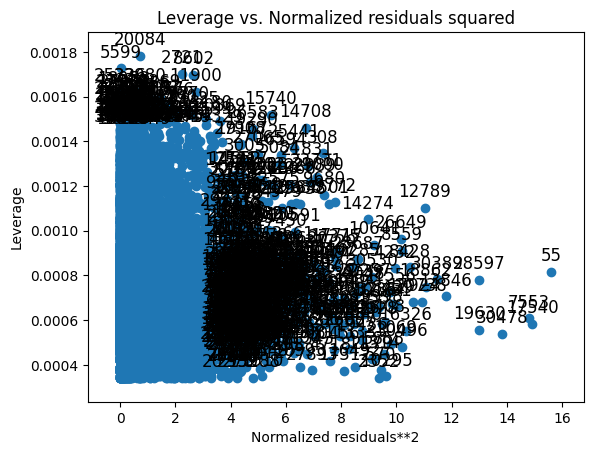

Leverage Level:  0.0012992074834351046
New size of the data: 14724


In [175]:
#leverage and squared residiual
sm.graphics.plot_leverage_resid2(LR_model1)
plt.show()

#leverage points: Leverage values greater than 2 times the number of predictors divided by the sample size
leverage_level = 2 * (len(LR_model1.params) - 1) / len(X_train)
print('Leverage Level: ',leverage_level)

#normalized residuals: using a value larger than 10

#getting all the observations with higher leverage or high normalized residuals

influence = LR_model1.get_influence()
# Leverage values
leverage = influence.hat_matrix_diag

# Normalized residuals squared
normalized_resid_sq = influence.resid_studentized_internal**2

# Create a mask for observations to keep lower leverage features
mask = (leverage <= leverage_level) & (normalized_resid_sq <= 5)

temp_df = temp_df[mask]
print('New size of the data:', sum(mask))

In [176]:
formula = 'avg_score ~ '
for col in best_cols[:7]:
  formula += col[0] + ' + '

formula = formula[:-3]
print("Regression formula:", formula)

LR_model2 = smf.ols(formula=formula, data=temp_df).fit()
y_pred = LR_model2.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'Linear Regression M2', 'R2': r2, 'MSE': mse, 'MAE': mae}])], ignore_index=True)

print('---')
print('Evaluation Metrics:')
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print('---')
print('Model Summary:')
print(LR_model2.summary())

Regression formula: avg_score ~ StandardLunch + ParentEduc + TestPrep + EthnicGroup + IsMale + StudyLevel + SportLevel
---
Evaluation Metrics:
R2 Score: 0.28058749434317876
Mean Squared Error: 152.60601047667484
Mean Absolute Error: 10.007261266462468
---
Model Summary:
                            OLS Regression Results                            
Dep. Variable:              avg_score   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     594.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:49:04   Log-Likelihood:                -57096.
No. Observations:               14724   AIC:                         1.142e+05
Df Residuals:                   14713   BIC:                         1.143e+05
Df Model:                          10                                         
Covariance Type:  

## 3.Model B: Support Vector Machines (Regressor)
In order for SVM to work, both models below had to go through 2 processes:
1. Encoding the categorical features
2. Used Randomized Search Cross Validation to find the best parameters for the model.
  * Parameters considered: C, epsilon, gamma & kernel


### 3.1 SVM Model 1
In this model, we are using all the features available to train the model

In [177]:
#reducing the sample size to speed up the gridsearch
encoder = ce.OneHotEncoder(cols=['EthnicGroup', 'ParentMaritalStatus'], use_cat_names=True)  # Replace 'your_categorical_column' with the actual column name

# Fit the encoder on the training data and transform both training and testing data
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

#SVR: build a ML model using Support Vect Machines regressor
param_grid = {
    'C': np.logspace(-5, 5, num=10, base=2),  # Logarithmic range for C,
    'epsilon': np.logspace(-5, 5, num=10, base=2),  # Logarithmic range for epsilon
    'gamma': np.logspace(-5, 5, num=10, base=2),  # Different gamma values to try
    'kernel': ['linear', 'rbf']  # Different kernels to try
    }

random_search = RandomizedSearchCV(svm.SVR(), param_grid, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train_encoded, y_train)

# Best estimator & prediction
svr_model1 = random_search.best_estimator_
y_pred = svr_model1.predict(X_test_encoded)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'SVR M1', 'R2': r2, 'MSE': mse, 'MAE': mae}])], ignore_index=True)

print('---')
print('Evaluation Metrics:')
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print('---')
print('Model Parameters:')
print (svr_model1.get_params())

Fitting 3 folds for each of 10 candidates, totalling 30 fits
---
Evaluation Metrics:
R2 Score: 0.2804142339861654
Mean Squared Error: 151.04297878735395
Mean Absolute Error: 9.975934533392447
---
Model Parameters:
{'C': np.float64(3.1748021039363996), 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': np.float64(6.857951862824587), 'gamma': np.float64(0.03125), 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### 3.2 SVM Model 2
In this model, we are using only the 7 most relevant features according to the exploratory data analysis.

In [178]:
#Using only the best_cols

#dropping the lower relevance columns
selected_cols = [col[0] for col in best_cols[:7]]
X_train = X_train[selected_cols] # Selecting columns using the extracted names
X_test = X_test[selected_cols]

#encoding the data
encoder = ce.OneHotEncoder(cols=['EthnicGroup'], use_cat_names=True)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

param_grid = {
    'C': np.logspace(-5, 5, num=10, base=2),  # Logarithmic range for C,
    'epsilon': np.logspace(-5, 5, num=10, base=2),  # Logarithmic range for epsilon
    'gamma': np.logspace(-5, 5, num=10, base=2),  # Different gamma values to try
    'kernel': ['linear', 'rbf']  # Different kernels to try
    }

random_search = RandomizedSearchCV(svm.SVR(), param_grid, cv=3)
random_search.fit(X_train_encoded, y_train)

# Best estimator & prediction
svr_model2 = random_search.best_estimator_
y_pred = svr_model2.predict(X_test_encoded)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'SVR M2', 'R2': r2, 'MSE': mse, 'MAE': mae}])], ignore_index=True)

print('---')
print('Evaluation Metrics:')
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print('---')
print('Model Parameters:')
print (svr_model2.get_params())

---
Evaluation Metrics:
R2 Score: 0.28330384517303253
Mean Squared Error: 150.43644166305893
Mean Absolute Error: 9.932676079025047
---
Model Parameters:
{'C': np.float64(3.1748021039363996), 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': np.float64(6.857951862824587), 'gamma': np.float64(0.6803950000871886), 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## 4.Evaluating Model Performance
The table below describes the model performance against test data for each of the models build in this exercise and it's relevant metrics:
* R2: R Squared
* MSE: Mean Squared Error
* MAE: Mean Absolute Error

It is possible to notice that the performance of the models were very close, with SVR M2 having the best R squared, followed by Linear Regression M1.
When looking at the erro values, It is possible to see that the Support Vector Machines were able to deliver lower values than the linear regressions, very likely due to the optimization of the parameters coming from applying RandomSearchCV.

In [179]:
# Create a styled HTML table
styled_table = model_performance.style.set_properties(**{
    'background-color': '#CAE9F5',
    'color': 'black',
    'border-width': '1px',
    'text-align': 'center',  # Center align the text within cells
    'font-size': '18px', # Increase font size
    'padding': '12px'
}).set_caption("Model Performance Summary").format(precision=5)

display(HTML(styled_table.to_html()))

,Model,R2,MSE,MAE
0,Linear Regression M1,0.28187,152.33439,10.01230
1,Linear Regression M2,0.28059,152.60601,10.00726
2,SVR M1,0.28041,151.04298,9.97593
3,SVR M2,0.28330,150.43644,9.93268


# Part C: Conclusion & Discussion


**Model Performance**:
* None of the models built in this exercise displayed a relevant R squared, meaning that they won't do a good job predicting the target values. In this case, this is a high indicator that these features are not relevant enough to predict a student's score.

* The linear regression models had a very similar performance than the SVM models, if we had to chose a model, we should pick the Linear Regression M1 as it is always better to use simpler models if they had similar performance tha more complex ones.

**Key Learnings:**
*   Data Cleaning: By doing the right data modifications to the dataset, the models ended up with only 2 categorical columns instead of 11. Making it easier to build and understand the regression models. Without this previous data cleaning, our models would end-up with a large increase in the number of features, increasing complexity.

*  Null Values: When cleaning the data, almost one third of the observations were dropped due to null values. In a real scenario, I would try and evaluate what features are relevant to the problem and drop them before removing their null values.  Additionally, we should consider feature interpolation in scenarions where it would be too expensive to drop the data.

* Target Selection: Aiming for simplification of the model and interpretability of the data, I decided to use the average score of the students' scores in different disciplines. This was only possible as the 3 different scores ['MathScore', 'ReadingScore', 'WritingScore'] were highly correlated and their distributions were very similar.

**Future Exploration:**
* Target Change: Predicting scores prooved to challenging with the current dataset.Dependending on the goal of a future exploration, I would convert the scores to letter grades (A, B, C, etc). Enabling the use of classification models.

* Feature Interpolation: In order to improve the usable data size, we could use interpolation method to try and estimate observations based on similar observations.